# Create corpus and Visualise

## Create Corpus

In the this exercise you will build your own corpus. It is easy.

Please, create a folder on your computer to download 5-10 of the top Gutenberg books from https://www.gutenberg.org/browse/scores/top 

You need to download the Plain-Text versions (ASCII).

Set my_folder to the directory you used to download the books. Do you remember the relative and absolute paths and how to set your working directory?

In [1]:
Wonderland = open("MyCorpus/11-0.txt", "r")
Pride = open("MyCorpus/1342-0.txt", "r")
Tale = open("MyCorpus/98-0.txt", "r")
Yellow = open("MyCorpus/pg1952.txt", "r")

Wonderland = Wonderland.read()
Pride = Pride.read()
Tale = Tale.read()
Yellow = Yellow.read()

### Clean corpus

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords = list(stopwords.words('english'))



def Corpuser(corpus):
    corpus = word_tokenize(corpus)
    corpus = [word.replace(" ", "") for word in corpus]
    corpus = [word.lower() for word in corpus if word.isalpha()]

    corpus = [word for word in corpus if word not in stopwords]
    
    return corpus

In [3]:
won_corp = Corpuser(Wonderland)
pride_corp = Corpuser(Pride)
tale_corp = Corpuser(Tale)
yel_corp = Corpuser(Yellow)

Success! Let's look at the content of the second book. 

In [4]:
print(Pride)

﻿The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Pride and Prejudice

Author: Jane Austen

Posting Date: August 26, 2008 [EBook #1342]
Release Date: June, 1998
Last Updated: October 17, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***




Produced by Anonymous Volunteers





PRIDE AND PREJUDICE

By Jane Austen



Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rig

### Create DocumentTermMatrix

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

docs = [str(won_corp), str(pride_corp), str(tale_corp), str(yel_corp)]
vectorizer = CountVectorizer(min_df=2)
X = vectorizer.fit_transform(docs)

dtm = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
dtm

,abhorrence,abide,abiding,abilities,able,abode,abominable,abroad,abrupt,abruptly,...,yesterday,yet,yield,yielded,yielding,young,younger,youngest,youth,youths
0,0,2,0,0,1,0,0,0,0,0,...,3,23,0,0,0,5,0,0,6,0
1,5,2,1,6,54,8,6,4,1,2,...,12,73,4,2,3,130,29,13,9,1
2,1,1,1,1,17,1,2,2,3,1,...,18,106,3,9,3,126,9,1,9,1
3,0,1,0,0,5,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0


You can now do any of the advanced processing we discussed. Here, we will simply add a few visualisations, starting with word clouds.

## Visualise Texts


### Wordclouds

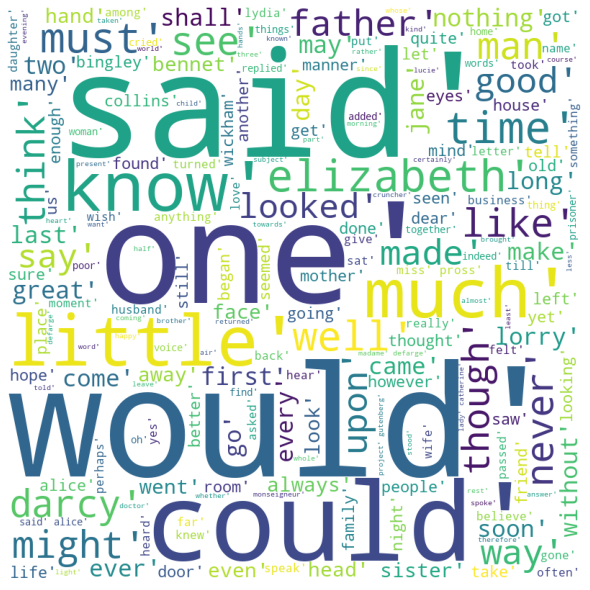

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

corpus = str(won_corp + pride_corp + tale_corp + yel_corp)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(corpus) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

The commonality wordcloud visualises common words across documents, which is of couse in this small corpus identical to the normal word cloud.

Try to change the colours!

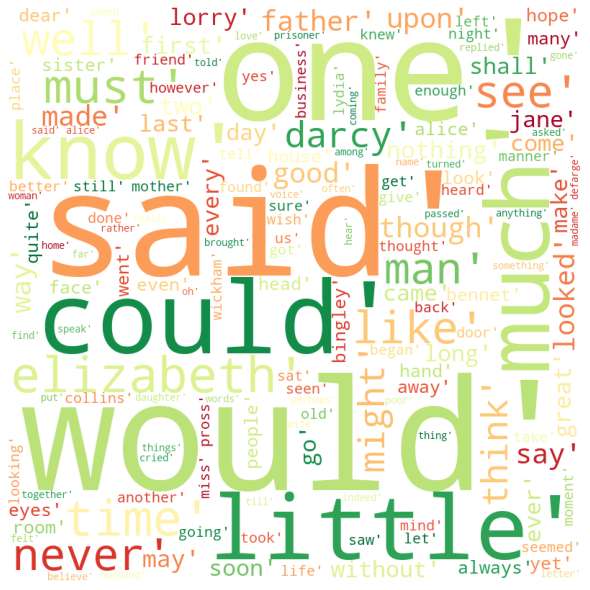

In [7]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10,
                colormap='RdYlGn').generate(corpus) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

We can also compare the wordclouds of two books

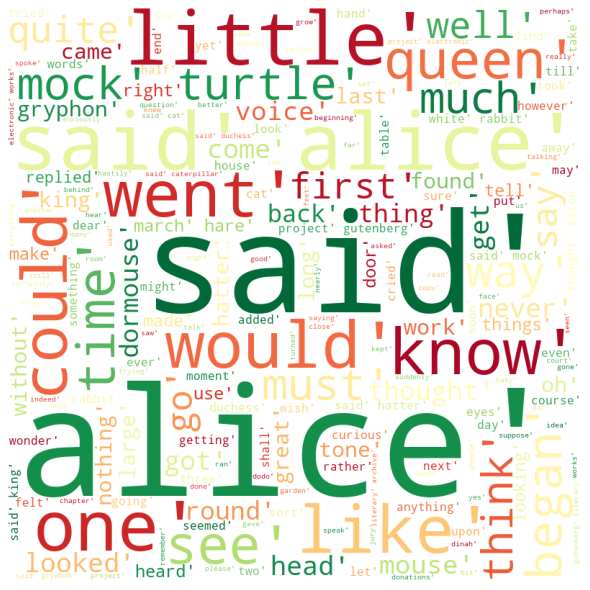

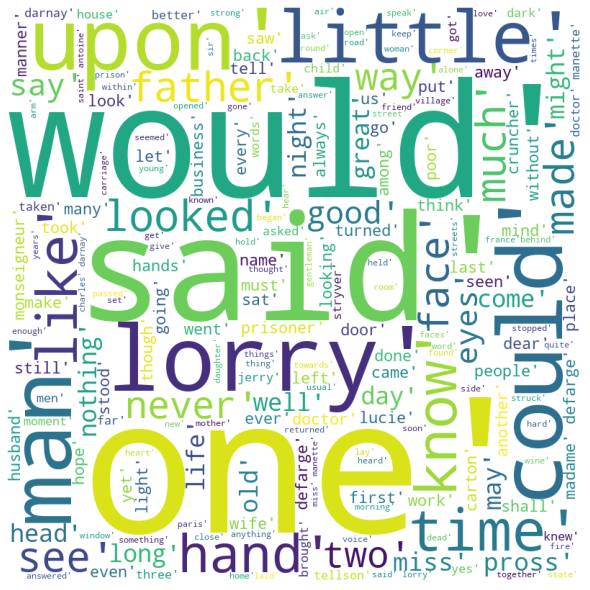

In [8]:
corpus = str(won_corp)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10,
                colormap='RdYlGn').generate(corpus) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

corpus = str(tale_corp)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(corpus) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Most frequent terms

In [9]:
from nltk import *

freqdist = FreqDist(won_corp+pride_corp+tale_corp+yel_corp)
freqdist.most_common(15)

[('said', 1553),
 ('would', 924),
 ('could', 900),
 ('one', 844),
 ('elizabeth', 634),
 ('little', 599),
 ('much', 577),
 ('know', 554),
 ('time', 534),
 ('miss', 520),
 ('must', 499),
 ('never', 466),
 ('well', 447),
 ('see', 442),
 ('man', 441)]

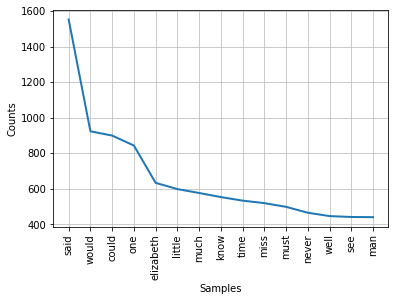

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
freqdist.plot(15)